In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

from itertools import product

# Always make it pretty.
plt.style.use('ggplot')

import samplers as spl

# Sampling

## Confidence Intervals

The central limit theorem (CLT) is great for finding a population mean from sample means. But how confident are we in what we find? This is measured by a **confidence interval**.

A confidence interval is the answer to a question like this

> How far do I have to go to the left and the right of the sample mean so that 95% of the time (i.e. in 95% of possible samples) I will have enclosed the population mean?

Let \\(alpha\\) denote the distance you move to the left and right of the sample mean when drawing your interval.  In notation, we are asking to find \\(alpha\\) such that

The **sample mean** is an approximation of the population mean: the expected value (mean of the individual sample means) of the sample mean *is* the population mean.

The sample mean is approximately normally distributed, the mean and variance of this normal distribution can be computed in terms of the population mean and variance, and the size of the sample.

Some notation:
  - \\(\mu\\) the population mean.
  - \\(\sigma^2\\) the population variance.
  - \\(\bar x\\) the **sample mean**.
  - \\(s\\) is the standard deviation of our **sample mean**
  - \\(\frac{\sigma}{\sqrt{n}}\\) is the standard error of the mean (SEM)

From here calculation of a **95%** confidence interval is straightforward:

$$ [\bar x-1.96\frac{\sigma}{\sqrt{n}}  ,  \bar x+1.96\frac{\sigma}{\sqrt{n}}] $$

What does this look like graphically and how can we interpret it?

[]

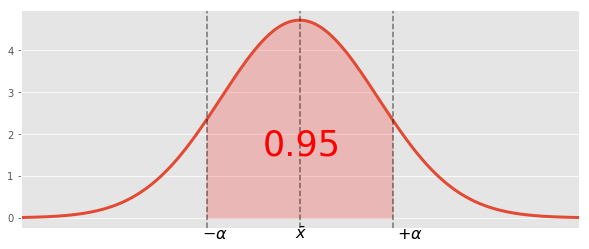

In [19]:
data = spl.secret_data()

sample_mean = np.mean(data)
sample_varaince = np.var(data)
distribution_of_sample_minus_population_mean = spl.Normal(0, np.sqrt(sample_varaince / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(-0.3, 0.3, num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
# Note: The 0.1 here is just for illustration, it does not correspond to
#       any particular value of alpha.
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.1 <= x) * (x <= 0.1) ), color="red", alpha=0.2)
ax.text(-0.04, 1.5, "0.95", fontsize=35, color="red")

ax.axvline(x=-0.1, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.105, -0.5, r"$-\alpha$", fontsize=16)

ax.axvline(x=0.1, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(0.105, -0.5, r"$+\alpha$", fontsize=16)

ax.axvline(x=0.0, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.005, -0.5, r"$\bar x$", fontsize=16)

ax.set_xticks([])

The shaded region is the area under the density between $-\alpha$ and $\alpha$. We want the **shaded region** to account for $0.95$ of the total area.

This means that each *half* of the shaded area to the *left and right* of zero should account for $0.475$ of the total area.